Episode 1: Total Reward: 0.1, Path taken: [0, 30, 31], Epsilon: 1.0
Episode 2: Total Reward: 102.0, Path taken: [0, 0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 63], Epsilon: 0.1
Episode 3: Total Reward: 101.6, Path taken: [0, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 63], Epsilon: 0.1
Episode 4: Total Reward: 101.2, Path taken: [0, 0, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 63], Epsilon: 0.1
Episode 5: Total Reward: 101.6, Path taken: [0, 0, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 63], Epsilon: 0.1
Episode 6: Total Reward: 0.0, Path taken: [0, 34], Epsilon: 0.1
Episode 7: Total Reward: 101.6, Path taken: [0, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 63], Epsilon: 0.1
Episode 8: Total Reward: 0.0, Path taken: [0, 54], Epsilon: 0.1
Episode 9: Total Reward: 102.0, Path taken: [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2

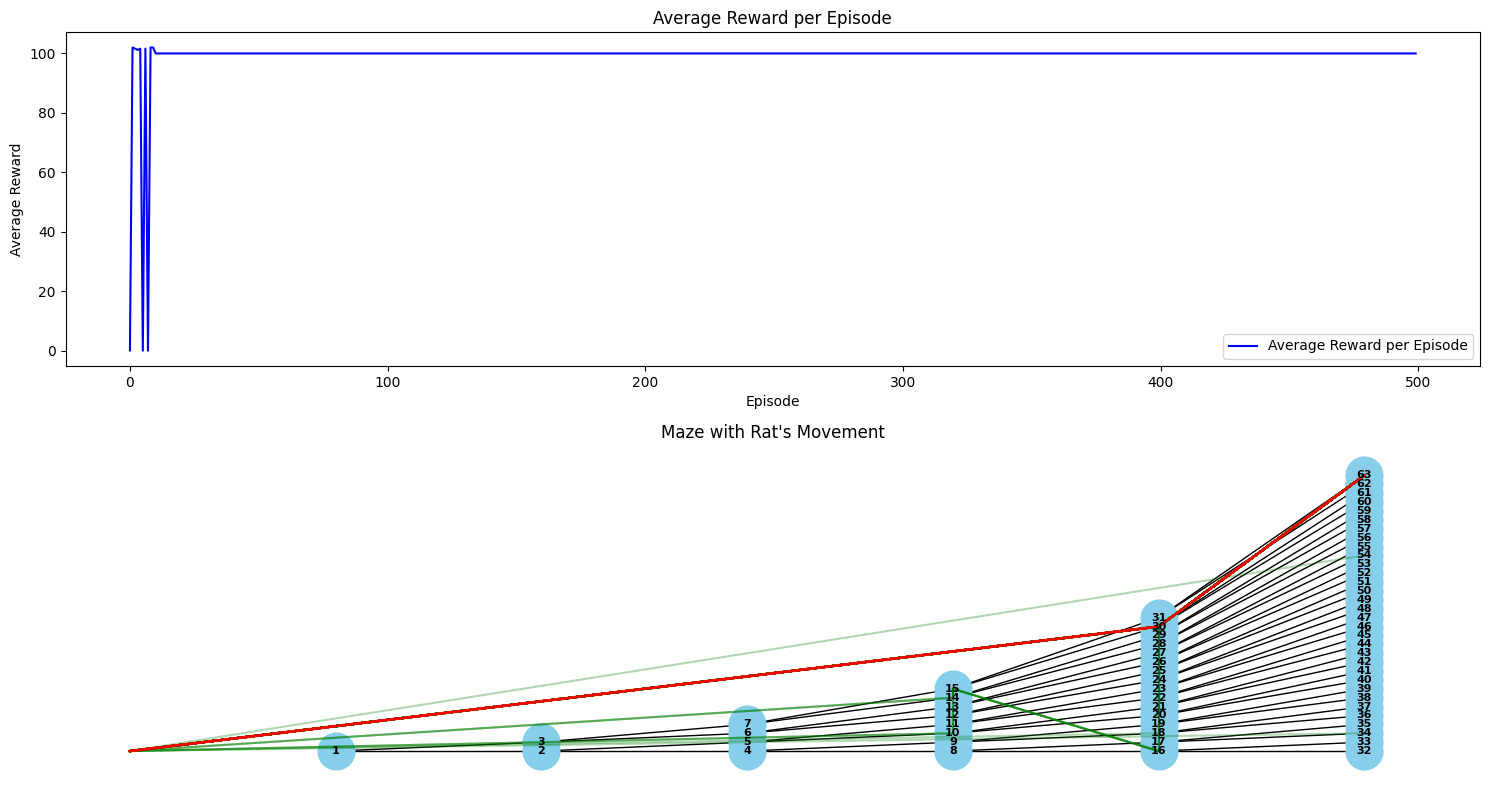

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

# Define the reward matrix
num_nodes = 64

# Define the reward matrix with level-wise rewards
reward_matrix = np.zeros((num_nodes, num_nodes)) - 1
reward_matrix[30,63] = 100  # Goal node

# Introduce intermediate rewards for nodes in the same level
for level in range(1, 6):
    start_node = 2**(level-1) - 1
    end_node = 2**level - 1
    for i in range(start_node, end_node):
        reward_matrix[i, i+1] = 0.1

reward_matrix[0, :] = 0  # Start node

# Define the Q-value matrix
q_values = np.random.rand(num_nodes, num_nodes)

# Define hyperparameters
gamma = 0.8  # Discount factor
alpha = 0.1  # Learning rate
epsilon_max = 1.0  # Initial epsilon for exploration
epsilon_min = 0.1  # Minimum epsilon for exploration
epsilon_decay = 0.01  # Epsilon decay rate

# Define the Q-learning algorithm with Softmax action selection and level-wise traversal
def q_learning_level_wise(start_state, goal_state, num_episodes=1000):
    routes_taken = []
    rewards_per_episode = []
    for episode in range(num_episodes):
        current_state = start_state
        route = [current_state]
        total_reward = 0
        epsilon = max(epsilon_min, epsilon_max * epsilon_decay ** episode)
        level = 0  # Initialize the current level
        while current_state != goal_state:
            # Check if there are available actions
            possible_actions = np.where(reward_matrix[current_state] >= 0)[0]
            if len(possible_actions) == 0:
                break

            # Prioritize actions leading to unexplored nodes within the same level
            level_actions = [action for action in possible_actions if (action // 2**level) % 2 == (current_state // 2**level) % 2]
            if level_actions:
                action_values = q_values[current_state, level_actions] / epsilon
                max_value = np.max(action_values)
                exp_values = np.exp(action_values - max_value)
                action_probs = exp_values / np.sum(exp_values)
                action = np.random.choice(level_actions, p=action_probs)
            else:
                action_values = q_values[current_state, possible_actions] / epsilon
                if len(action_values) > 0:
                    max_value = np.max(action_values)
                    exp_values = np.exp(action_values - max_value)
                    action_probs = exp_values / np.sum(exp_values)
                    action = np.random.choice(possible_actions, p=action_probs)
                else:
                    # If no available actions, choose a random action from possible_actions
                    action = np.random.choice(possible_actions)

            next_state = action
            route.append(next_state)
            reward = reward_matrix[current_state, action]
            total_reward += reward

            # Update Q-value using Bellman equation
            q_values[current_state, action] += alpha * (reward + gamma * np.max(q_values[next_state]) - q_values[current_state, action])

            current_state = next_state
            if (next_state // 2**level) % 2 != (current_state // 2**level) % 2:
                level += 1  # Move to the next level

        routes_taken.append(route)
        rewards_per_episode.append(total_reward)
        print(f"Episode {episode + 1}: Total Reward: {total_reward}, Path taken: {route}, Epsilon: {epsilon}")

    return q_values, routes_taken, rewards_per_episode

# Run Q-learning algorithm with Softmax action selection
start_time = time.time()
q_values, routes_taken, rewards_per_episode = q_learning_level_wise(0, 63, num_episodes=500)
end_time = time.time()

# Print the time taken
print("Time taken:", end_time - start_time, "seconds")

# Create the network graph
G = nx.Graph()

# Define the edges to form a complex structure
edges_complex = [
    # Level 1
    (1, 2), (1, 3),
    # Level 2
    (2, 4), (2, 5), (3, 6), (3, 7),
    # Level 3
    (4, 8), (4, 9), (5, 10), (5, 11), (6, 12), (6, 13), (7, 14), (7, 15),
    # Level 4 - more complexity
    (8, 16), (8, 17), (9, 18), (9, 19), (10, 20), (10, 21), (11, 22), (11, 23),
    (12, 24), (12, 25), (13, 26), (13, 27), (14, 28), (14, 29), (15, 30), (15, 31),
    # Level 5 - even more complexity
    (16, 32), (16, 33), (17, 34), (17, 35), (18, 36), (18, 37), (19, 38), (19, 39),
    (20, 40), (20, 41), (21, 42), (21, 43), (22, 44), (22, 45), (23, 46), (23, 47),
    (24, 48), (24, 49), (25, 50), (25, 51), (26, 52), (26, 53), (27, 54), (27, 55),
    (28, 56), (28, 57), (29, 58), (29, 59), (30, 60), (30, 61), (31, 62), (31, 63),
]

# Add edges to the graph
G.add_edges_from(edges_complex)

# Define positions for each node manually
pos = {
    0: (0, 0), 1: (1, 0), 2: (2, 0), 3: (2, 1), 4: (3, 0), 5: (3, 1), 6: (3, 2), 7: (3, 3),
    8: (4, 0), 9: (4, 1), 10: (4, 2), 11: (4, 3), 12: (4, 4), 13: (4, 5), 14: (4, 6), 15: (4, 7),
    16: (5, 0), 17: (5, 1), 18: (5, 2), 19: (5, 3), 20: (5, 4), 21: (5, 5), 22: (5, 6), 23: (5, 7),
    24: (5, 8), 25: (5, 9), 26: (5, 10), 27: (5, 11), 28: (5, 12), 29: (5, 13), 30: (5, 14), 31: (5, 15),
    32: (6, 0), 33: (6, 1), 34: (6, 2), 35: (6, 3), 36: (6, 4), 37: (6, 5), 38: (6, 6), 39: (6, 7),
    40: (6, 8), 41: (6, 9), 42: (6, 10), 43: (6, 11), 44: (6, 12), 45: (6, 13), 46: (6, 14), 47: (6, 15),
    48: (6, 16), 49: (6, 17), 50: (6, 18), 51: (6, 19), 52: (6, 20), 53: (6, 21), 54: (6, 22), 55: (6, 23),
    56: (6, 24), 57: (6, 25), 58: (6, 26), 59: (6, 27), 60: (6, 28), 61: (6, 29), 62: (6, 30), 63: (6, 31)
}

# Draw the network graph
plt.figure(figsize=(15, 8))

# Plot the average reward per episode
plt.subplot(2, 1, 1)
plt.plot(rewards_per_episode, label='Average Reward per Episode', color='blue')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')
plt.legend()

# Draw the mouse's movement
plt.subplot(2, 1, 2)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_weight="bold", arrowsize=10)
for episode, route in enumerate(routes_taken):
    for i in range(len(route) - 1):
        plt.plot([pos[route[i]][0], pos[route[i+1]][0]], [pos[route[i]][1], pos[route[i+1]][1]], 'green', alpha=0.3)

# Draw the final route taken to the goal node
final_route = routes_taken[-1]  # Final route from the last episode
for i in range(len(final_route) - 1):
    plt.plot([pos[final_route[i]][0], pos[final_route[i+1]][0]], [pos[final_route[i]][1], pos[final_route[i+1]][1]], 'red', linewidth=2)

plt.title("Maze with Rat's Movement")
plt.tight_layout()
plt.show()